<a href="https://colab.research.google.com/github/stefymojica/analisis_marketing_digital/blob/master/markeing_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MARKETING DIGITAL**


---











Objetivo: Crear un modelo predictivo que permita predecir el CTR(click throught rate)

In [299]:
#Cargando librerias

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [300]:
XY = pd.read_csv("https://proyectosmachinelearning.s3.us-east-2.amazonaws.com/Base_proyecto.csv")

In [301]:
XY.head()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
0,1,FULLSCREEN,320x480,21,UNITY,WIFI,APP,-1,Other,UNKNOWN,6,29,0.206897
1,2,FULLSCREEN,320x480,23,UNITY,WIFI,APP,-1,com.wordgame.puzzle.board.es,UNKNOWN,13,86,0.151163
2,3,0,320x480,23,OPERA_MEDIA,CELL_3G,APP,Claro,com.jamendoandoutly.mainpakkage,UNKNOWN,0,11,0.000000
3,4,FULLSCREEN,320x480,23,MOPUB,CELL_4G,APP,Movistar,com.drilens.wamr,UNKNOWN,0,38,0.000000
4,5,0,320x480,5,OPERA_MEDIA,WIFI,APP,Movistar,com.jam.endo,UNKNOWN,0,19,0.000000


In [302]:
print(u'- El numero de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El numero de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))

- El numero de filas en el dataset es: 41352
- El numero de columnas en el dataset es: 13
- Los nombres de las variables son: ['id', 'ad_position', 'ad_size', 'hour_of_day_utc', 'inventory_source', 'platform_bandwidth', 'environment_type', 'platform_carrier', 'app_bundle', 'domain', 'clicks', 'impressions', 'ctr']


In [303]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41352 entries, 0 to 41351
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  41352 non-null  int64  
 1   ad_position         41352 non-null  object 
 2   ad_size             41352 non-null  object 
 3   hour_of_day_utc     41352 non-null  int64  
 4   inventory_source    41352 non-null  object 
 5   platform_bandwidth  41352 non-null  object 
 6   environment_type    41352 non-null  object 
 7   platform_carrier    41352 non-null  object 
 8   app_bundle          41352 non-null  object 
 9   domain              41352 non-null  object 
 10  clicks              41352 non-null  int64  
 11  impressions         41352 non-null  int64  
 12  ctr                 41352 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 4.1+ MB


# Preprocesamiento de datos

In [304]:
XY.isnull().sum()

id                    0
ad_position           0
ad_size               0
hour_of_day_utc       0
inventory_source      0
platform_bandwidth    0
environment_type      0
platform_carrier      0
app_bundle            0
domain                0
clicks                0
impressions           0
ctr                   0
dtype: int64

In [305]:
XY.isnull().any()

id                    False
ad_position           False
ad_size               False
hour_of_day_utc       False
inventory_source      False
platform_bandwidth    False
environment_type      False
platform_carrier      False
app_bundle            False
domain                False
clicks                False
impressions           False
ctr                   False
dtype: bool

Como se puede evidenciar no existen valores nulos en ninguna de las variables de el DataFrame

## Grafico de barras de Frecuencias relativas

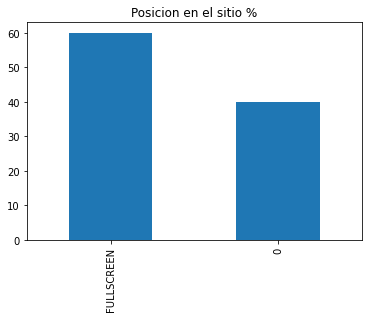

In [306]:
plot = (100 * XY_C['ad_position'].value_counts()/ len(XY_C['ad_position'])).plot(kind='bar', title='Posicion en el sitio %')

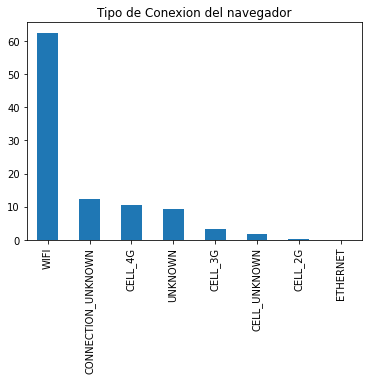

In [307]:
plot = (100 * XY['platform_bandwidth'].value_counts()/ len(XY['platform_bandwidth'])).plot(kind='bar', title='Tipo de Conexion del navegador')

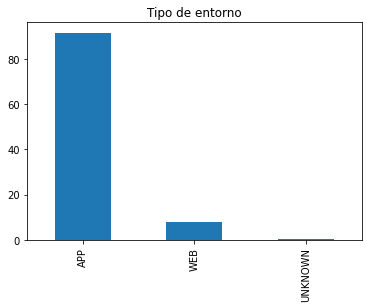

In [308]:
plot = (100 * XY['environment_type'].value_counts()/ len(XY['environment_type'])).plot(kind='bar', title='Tipo de entorno')


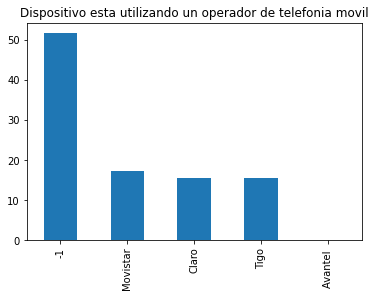

In [309]:
plot = (100 * XY['platform_carrier'].value_counts()/ len(XY['platform_carrier'])).plot(kind='bar', title='Dispositivo esta utilizando un operador de telefonia movil')

## Categoricas a numericas

1. A continuacion se convertiran las categoricas a numericas, esto con el fin de introducirlas en los modelos

2. Se utilizara LabelEncoder para convertir estas variables

In [310]:
XY.select_dtypes(exclude=['number']).columns

Index(['ad_position', 'ad_size', 'inventory_source', 'platform_bandwidth',
       'environment_type', 'platform_carrier', 'app_bundle', 'domain'],
      dtype='object')

In [311]:
le =  LabelEncoder()

In [312]:
# ad_position
XY['ad_position'].value_counts()

FULLSCREEN          30357
0                    7132
ABOVE_THE_FOLD       3063
POSITION_UNKNOWN      605
BELOW_THE_FOLD        171
FOOTER                 23
HEADER                  1
Name: ad_position, dtype: int64

In [337]:
XY.ad_position = le.fit_transform(XY.ad_position.values)

In [348]:
XY['ad_position'].value_counts()

4    30357
0     7132
1     3063
6      605
2      171
3       23
5        1
Name: ad_position, dtype: int64

In [316]:
# ad_size

XY['ad_size'].value_counts()

320x480     28294
320x50       4656
480x320      3940
300x250      2729
300x50        626
728x90        380
300x600       295
320x100       102
-1x-1         102
300x480        52
336x280        38
411x64         34
360x56         25
160x600        21
250x250        19
300x100        13
768x1024        4
320x568         4
414x736         3
412x814         2
375x667         2
360x640         1
360x592         1
412x790         1
360x598         1
424x808         1
256x192         1
370x58          1
1x1             1
320x570         1
360x703         1
400x824         1
Name: ad_size, dtype: int64

In [339]:
XY.ad_size = le.fit_transform(XY.ad_size.values)

In [318]:
# inventory_source

XY['inventory_source'].value_counts()

UNITY            25201
MOPUB             6282
OPERA_MEDIA       3267
TRIPLELIFT        2948
SMARTADSERVER     1247
RUBICON            996
VERVE              583
GOOGLE_ADX         361
CRITEO             324
INMOBI              54
APPNEXUS            48
OPENX               15
RICHAUDIENCE        14
UNRULYX             10
MILLENNIAL           1
INNERACTIVE          1
Name: inventory_source, dtype: int64

In [342]:
XY.inventory_source = le.fit_transform(XY.inventory_source.values)


In [343]:
XY['inventory_source'].value_counts()

13    25201
6      6282
8      3267
12     2948
11     1247
10      996
15      583
2       361
1       324
3        54
0        48
7        15
9        14
14       10
5         1
4         1
Name: inventory_source, dtype: int64

In [320]:
# platform_bandwidth

XY['platform_bandwidth'].value_counts()

WIFI                  25812
CONNECTION_UNKNOWN     5107
CELL_4G                4377
UNKNOWN                3871
CELL_3G                1322
CELL_UNKNOWN            781
CELL_2G                  65
ETHERNET                 17
Name: platform_bandwidth, dtype: int64

In [344]:
# Esta variable se dividio en las que son plataformas con WIFI  y las que estan utilizando plataformas distintas a WIFI

XY.loc[XY['platform_bandwidth'] != 'WIFI', 'platform_bandwidth'] = 0
XY.loc[XY['platform_bandwidth'] == 'WIFI', 'platform_bandwidth'] = 1
XY['platform_bandwidth'] = XY['platform_bandwidth'].astype(int)

In [345]:
# environment_type

XY['environment_type'].value_counts()

APP        37923
WEB         3329
UNKNOWN      100
Name: environment_type, dtype: int64

In [346]:
XY.environment_type = le.fit_transform(XY.environment_type.values)

In [349]:
XY['environment_type'].value_counts()

0    37923
2     3329
1      100
Name: environment_type, dtype: int64

In [324]:
# platform_carrier

XY['platform_carrier'].value_counts()

-1          21382
Movistar     7170
Claro        6406
Tigo         6379
Avantel        15
Name: platform_carrier, dtype: int64

In [350]:
XY.platform_carrier = le.fit_transform(XY.platform_carrier.values)

In [351]:
XY['platform_carrier'].value_counts()

0    21382
3     7170
2     6406
4     6379
1       15
Name: platform_carrier, dtype: int64

In [326]:
# app_bundle

XY['app_bundle'].value_counts()

Other                              25857
UNKNOWN                             3435
com.jamendoandoutly.mainpakkage      424
com.merge.cube.winner                411
com.callapp.contacts                 342
                                   ...  
com.superbox.aos.fire2048             85
com.zareklamy                         85
com.movinapp.dict.french.free         84
com.mobz.vd.in                        83
com.firsttouchgames.hero2             83
Name: app_bundle, Length: 86, dtype: int64

In [352]:
XY.app_bundle = le.fit_transform(XY.app_bundle.values)

In [328]:
# domain

XY['domain'].value_counts()

UNKNOWN                      36239
Other                          611
rtbplus.smartadserver.com      544
callapp.com                    342
itunes.apple.com               195
                             ...  
absolutelyconnected.com         10
ahoramismo.com                  10
wikihow.com                     10
hi5.com                         10
lavidalucida.com                10
Name: domain, Length: 94, dtype: int64

In [353]:
XY.domain = le.fit_transform(XY.domain.values)

## Comprobacion de datos numericos

Se comprueba que no existan variables categoricas dentro de los datos

In [354]:
XY.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

# Division en features X y target Y

In [355]:
# Para X se tomaron todas las variables menos "ctr" ya que es la variable objetivo
X = XY.drop('ctr', axis=1)

# Para la variable Target solo se tomo la variable "ctr"
Y = XY['ctr']

# Visualizaciones y correlaciones

In [356]:
XY.describe()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
count,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.0,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000
mean,61397.057724,3.108362,12.590927,9.012309,11.144008,0.0,0.163426,1.447403,14.094216,6.353042,0.776601,28.913426,0.123057
std,69941.193238,1.645254,5.853822,6.577073,2.995516,0.0,0.545649,1.598057,22.633631,17.569232,2.196003,99.382481,0.292073
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11498.750000,2.000000,11.000000,4.000000,8.000000,0.0,0.000000,0.000000,2.000000,1.000000,0.000000,7.000000,0.000000
50%,22938.500000,4.000000,11.000000,8.000000,13.000000,0.0,0.000000,0.000000,2.000000,1.000000,0.000000,11.000000,0.000000
75%,135533.250000,4.000000,11.000000,14.000000,13.000000,0.0,0.000000,3.000000,16.000000,1.000000,1.000000,22.000000,0.062500
max,209561.000000,6.000000,31.000000,23.000000,15.000000,0.0,2.000000,4.000000,85.000000,93.000000,64.000000,3745.000000,1.000000


1. Se puede observar que el porcentaje promedio de la variable target es de 12%, lo cual demuestra que en general las publicidades en linea tienen buen exito.

## Boxplot

In [357]:
# Se normaliza la variable X para representar los Boxplot en una misma escala
X_normalizado = (X-X.mean())/X.std()

In [358]:
X_normalizado[:2]


,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions
0,-0.877824,0.541945,-0.271776,1.822648,0.61959,NaN,-0.299508,-0.905727,-0.534347,-0.304683,2.378594,0.000871
1,-0.877810,0.541945,-0.271776,2.126735,0.61959,NaN,-0.299508,-0.905727,2.249121,-0.304683,5.566204,0.574413


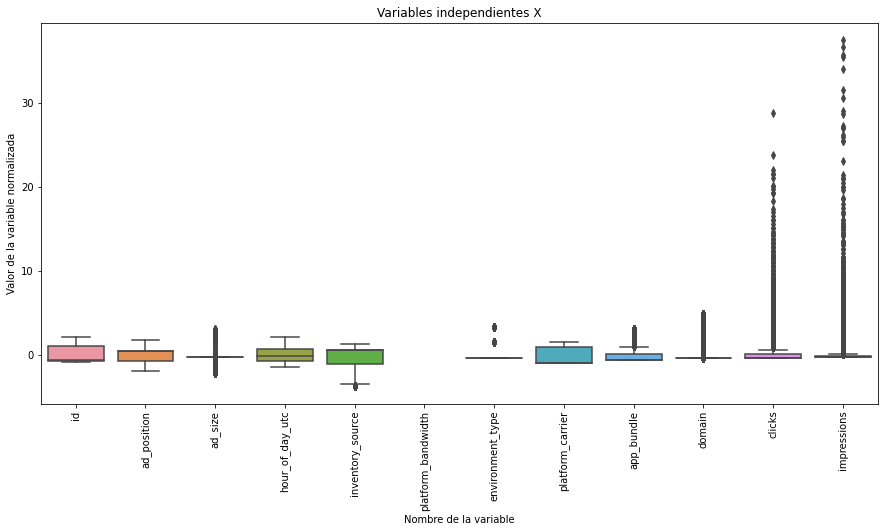

In [359]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_=plt.xlabel('Nombre de la variable')

1. Se puede ver que en el Boxplot no hay muchos outliers

## Histogramas

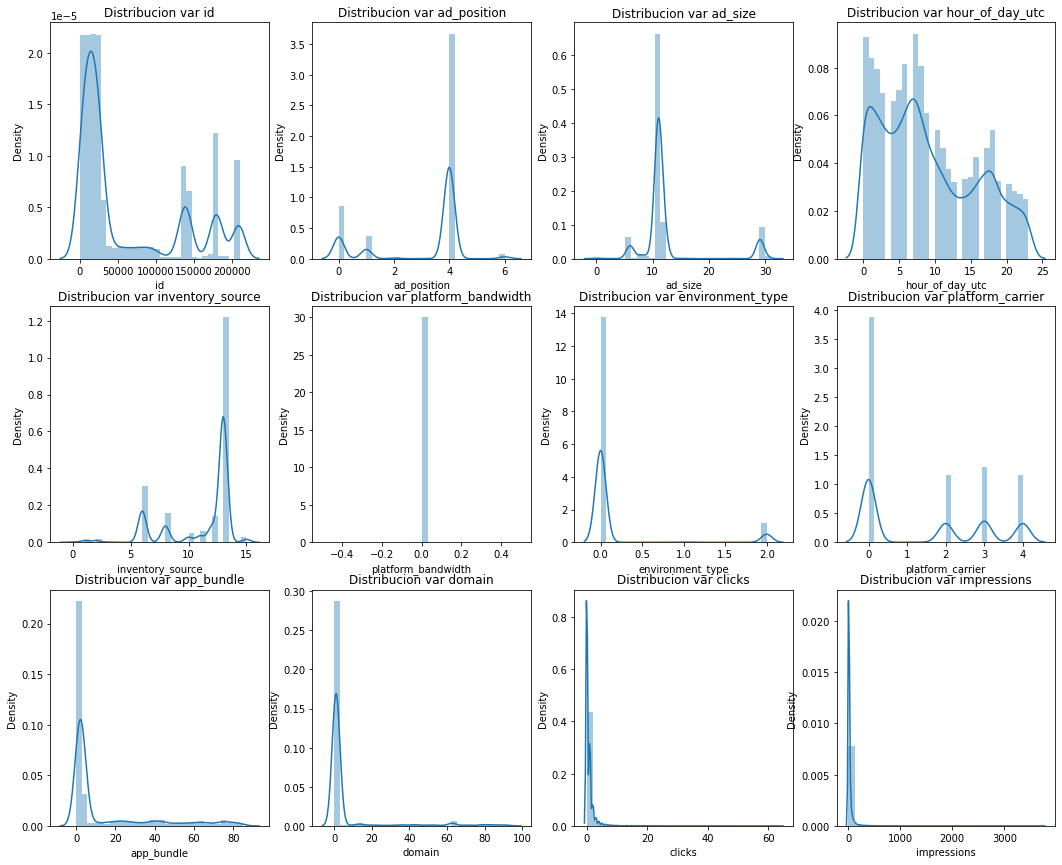

In [360]:
plt.figure(figsize=(18,20))
n = 0
for i, columns in enumerate(X.columns):
  n+=1
  plt.subplot(4, 4, n)
  sns.distplot(X[columns], bins=30)
  plt.title('Distribucion var {}'.format(columns))
plt.show()

1. La posicion en el sitio web con mayor frecuencia es 4
2. Las horas del día con mas transito estan dentro de 0 y 9 
3. El tipo de navegacion que mas se utiliza es con WIFI
4. El entorno con mayor frecuecia es la APP

# Relacion variable vs Target

In [361]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()


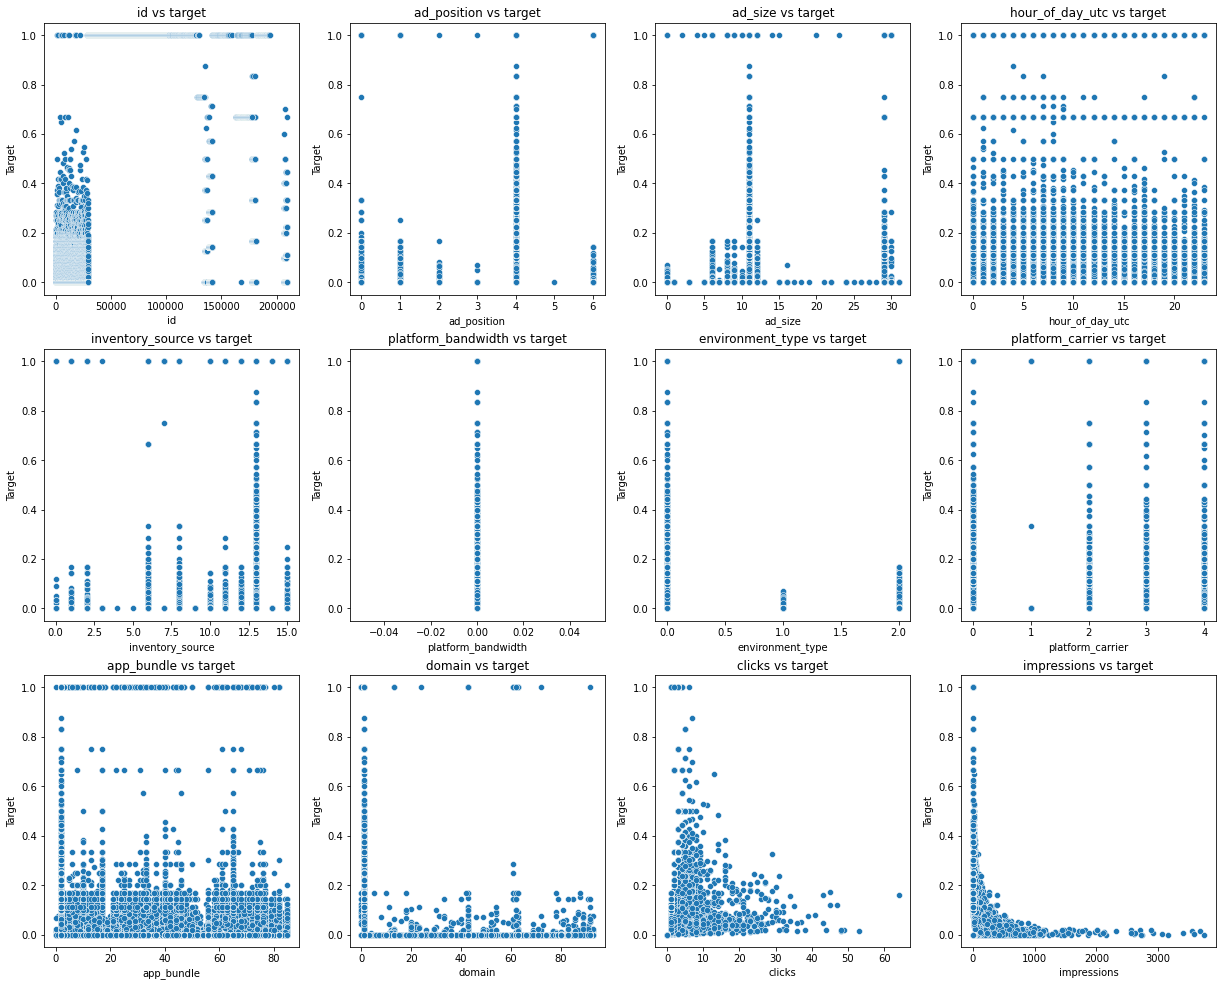

In [362]:
relaciones_vs_target(X,Y)

In [363]:
def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 


def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4.; fig_tamanio = 4.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

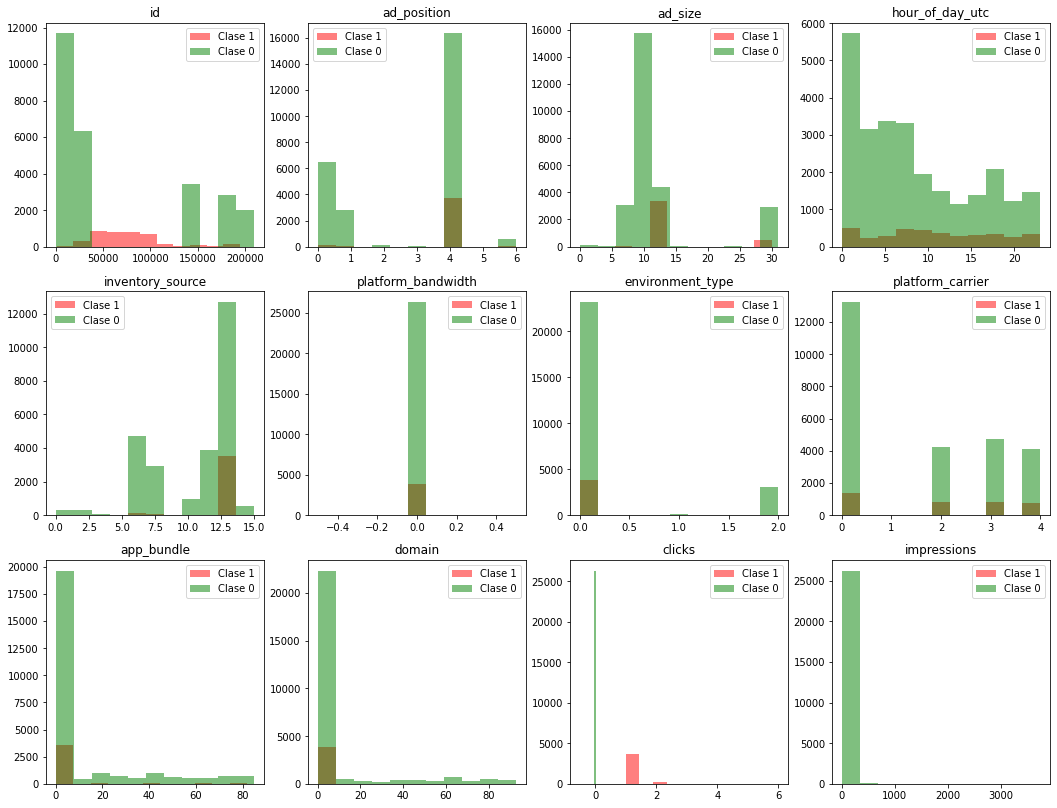

In [364]:
hist_pos_neg_feat(X, Y)

## Matriz de correlaciones


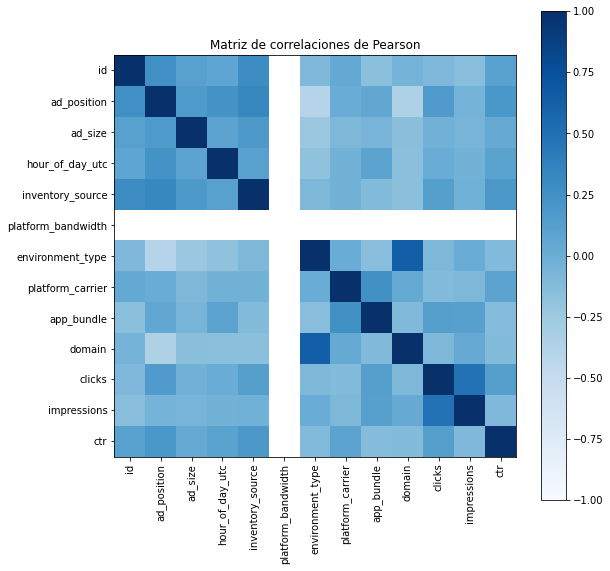

In [365]:
matriz_correlaciones = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

1. Ad_position sigue siendo una de las variables que tienen mayor relacion con la variable target, se puede identificar con la correlacion de pearson, donde tiene una relacion bastante alta con mas de 0.50

# Variables con mayor correlacion con la target



In [366]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
platform_bandwidth,NaN
ad_position,0.195657
inventory_source,0.194050
app_bundle,-0.131622
clicks,0.130151
domain,-0.117609
environment_type,-0.116143
id,0.106498
hour_of_day_utc,0.099155
impressions,-0.095824


# Estandarizacion de los datos

In [367]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

# Division en train y test


In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Modelo de regresion lineal

In [369]:
# Se crea un modelo de regresion lineal
modelo1 = linear_model.LinearRegression()


In [370]:
# Se entrena el modelo
modelo1.fit(X_train, Y_train)

LinearRegression()

In [371]:
# Se puede predecir usando el modelo
Y_pred = modelo1.predict(X_test)

In [372]:
print(modelo1.intercept_)


0.12344696296500832


In [373]:
print(modelo1.coef_)

[ 3.45521126e-03  2.40375914e-02 -7.82932265e-03  1.97724366e-02
  3.06379365e-02 -3.46944695e-18 -1.63008644e-02  4.38359197e-02
 -5.55080355e-02 -8.40409886e-03  6.20242124e-02 -4.08165748e-02]


In [374]:
# predicciones
y_test = np.array(list(Y_test))
y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,0.000000,0.118171
1,0.000000,0.018664
2,0.071429,0.072591
3,0.000000,0.052794
4,0.000000,0.029788
...,...,...
8266,0.000000,0.112501
8267,0.100000,0.209335
8268,1.000000,0.239221
8269,0.090909,0.191074


In [375]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Error cuadratico medio en test: %.2f' %mean_squared_error(Y_test, Y_pred))
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Estadistico R_2: %.2f' % r2_score(Y_test, Y_pred))


Error Absoluto Medio: 0.17070795797159477
Error cuadratico medio en test: 0.07
Raíz del error cuadrático medio: 0.2708189043017573
Estadistico R_2: 0.13


# Modelo de Arboles de decision

In [376]:
# Division del dataset
X_train, X_test, Y_train, Y_test =  train_test_split(X_estandarizado, Y, random_state=5)

In [377]:
modelo2 = DecisionTreeRegressor()

In [378]:
# Entrenando el modelo
modelo2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [379]:
# Estructura del arbol creado
print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

Profundidad del árbol: 22
Número de nodos terminales: 1464


In [380]:
# Predictores

importancia_predictores = pd.DataFrame(
    {'predictor':X.columns,
     'importancia': modelo2.feature_importances_}
)

print("Importancia de los predictores del modelo")
print("-----------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores del modelo
-----------------------------------------


,predictor,importancia
11,impressions,9.672165e-01
10,clicks,3.271515e-02
0,id,4.697852e-05
3,hour_of_day_utc,9.717320e-06
8,app_bundle,6.141574e-06
7,platform_carrier,5.188923e-06
4,inventory_source,3.483801e-07
2,ad_size,8.696567e-09
1,ad_position,2.585118e-09
6,environment_type,3.272779e-11


## Validacion cruzada

In [381]:
params = {"max_depth": range(3,7)}
regrs_opt = GridSearchCV(modelo2, params, cv=3)

In [382]:
regrs_opt.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 7)})

In [383]:
print('El mejor estimador es: {}'.format(regrs_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=6)


Profundidad del árbol: 6
Número de nodos terminales: 22


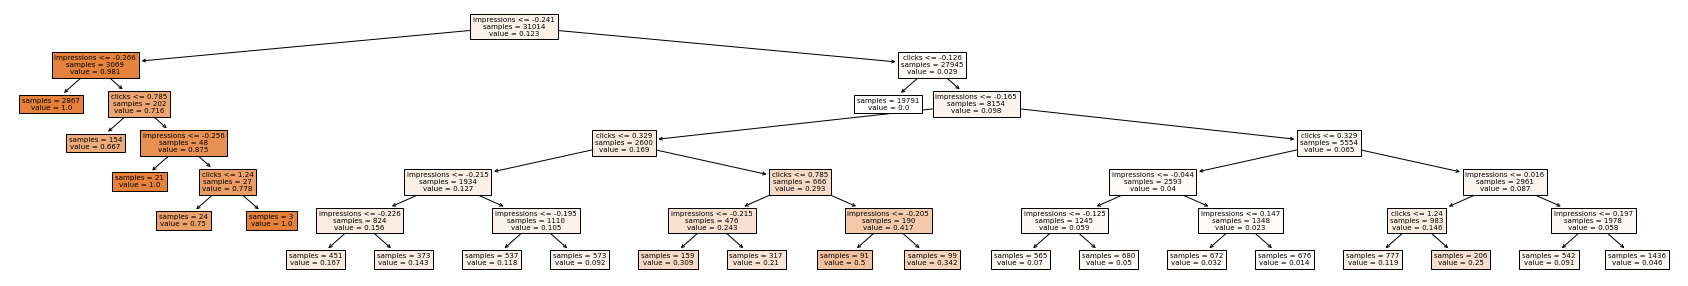

In [384]:
# Estructura del arbol creado
modelo_final2 = regrs_opt.best_estimator_
print(f"Profundidad del árbol: {modelo_final2.get_depth()}")
print(f"Número de nodos terminales: {modelo_final2.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(30, 5))
plot = plot_tree(
            decision_tree = modelo_final2,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            ax            = ax
       )

## Prediccion y evaluacion del modelo

In [385]:
predicciones = modelo2.predict(X = X_test)

rmse = mean_squared_error(
    y_true = Y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.004020055944803232


In [386]:
predicciones = modelo_final2.predict(X = X_test)

rmse = mean_squared_error(
    y_true = Y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.017685938890804817


El proceso de podado consigue reducir el error rmse del modelo de 0.00424 a 0.017. Las predicciones ultimo modelo de arbol de decision se alejan en promedio 0.017 unidades del valor real. 

# Modelo de regresion con Redes neuronales 

In [387]:
def constructor_modelo():
# Definicion del modelo
  modelo3 = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)])

# Compilacion del modelo
  modelo3.compile(loss='mse',
                optimizer='sgd',
                metrics=['binary_accuracy'])
  return modelo3

In [388]:
model = constructor_modelo()

In [389]:
historico = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
970/970 [==============================] - 2s 1ms/step - loss: 0.0622 - binary_accuracy: 0.6471
Epoch 2/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0370 - binary_accuracy: 0.6971
Epoch 3/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0288 - binary_accuracy: 0.7120
Epoch 4/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0242 - binary_accuracy: 0.7178
Epoch 5/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0211 - binary_accuracy: 0.7207
Epoch 6/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0188 - binary_accuracy: 0.7222
Epoch 7/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0169 - binary_accuracy: 0.7231
Epoch 8/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0153 - binary_accuracy: 0.7236
Epoch 9/100
970/970 [==============================] - 1s 1ms/step - loss: 0.0139 - binary_accuracy: 0.7241
Epoch 10/100
970/970 [======

El modelo empezo a predecir un 0.64, a medida que este iba realizando mas entrenamientos en las epocas iba mejorando su prediccion, donde paso por 0.76, 0.69, 0.72 hasta llegar a 0.73 de prediccion. 

In [395]:
# Se muestra el history de las ultimas 5 epocas realizadas
hist = pd.DataFrame(historico.history)
hist['epoch'] = historico.epoch
hist.tail()

,loss,binary_accuracy,epoch
95,0.001760,0.730863,95
96,0.001757,0.730831,96
97,0.001733,0.730831,97
98,0.001713,0.730863,98
99,0.001702,0.730863,99


In [396]:
# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


Se puede evideniar que el modelo que se realizo fue uno secuencial, con sus capas respectivas y cada una de ellas con 64 neuronas

## Analizando errores

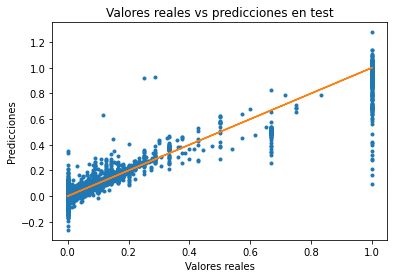

In [401]:
Y_test_pred = model.predict(X_test)
plt.title('Valores reales vs predicciones en test')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_test, Y_test_pred, '.', Y_test, Y_test, '-')

Se puede observar que la linea de test no toma los outliers

## Validacion del modelo

In [403]:
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
1
2
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

970/970 [==============================] - 1s 1ms/step - loss: 0.0019 - binary_accuracy: 0.7309

binary_accuracy: 73.09%
970/970 [==============================] - 1s 1ms/step - loss: 0.0019 - binary_accuracy: 0.7309

binary_accuracy: 73.09%
970/970 [==============================] - 1s 1ms/step - loss: 0.0019 - binary_accuracy: 0.7309

binary_accuracy: 73.09%
970/970 [==============================] - 1s 1ms/step - loss: 0.0019 - binary_accuracy: 0.7309

binary_accuracy: 73.09%


El modelo me esta prediciendo el 73.09% 